In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [12]:
df_cassandra = pd.read_csv("cassandra_linear_results.csv", usecols = ["Ref_time","Disk_Usage"])
df_cassandra.head()

,Ref_time,Disk_Usage
0,0,1.184
1,2,1.188
2,3,1.192
3,4,1.196
4,5,1.200


In [13]:
df_cassandra.dropna()
df_cassandra['Ref_time'] = df_cassandra['Ref_time'].astype("Int64")
df_cassandra['Disk_Usage'] = df_cassandra['Disk_Usage'].astype("float64")

In [14]:
X = df_cassandra[['Ref_time']]
Y = df_cassandra['Disk_Usage']
X

,Ref_time
0,0
1,2
2,3
3,4
4,5
...,...
27636,32677
27637,32679
27638,32680
27639,32681


In [15]:
regressor_cassandra_linear = LinearRegression()

In [16]:
regressor_cassandra_linear.fit(X, Y)

LinearRegression()

In [17]:
cassandra_linear_pred = regressor_cassandra_linear.predict(X)

In [18]:
regressor_cassandra_linear.score(X,Y)

0.9999895546202271

In [19]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, cassandra_linear_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y, cassandra_linear_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, cassandra_linear_pred)))

Mean Absolute Error: 0.10813537441187002
Mean Squared Error: 0.017924610095326206
Root Mean Squared Error: 0.13388282225635298


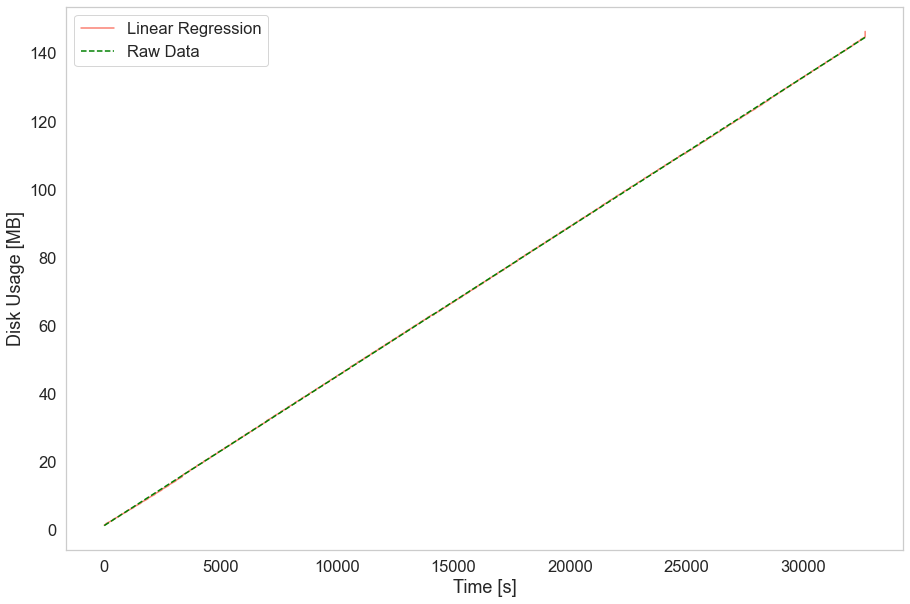

In [32]:
fig5 = plt.figure(figsize=(15, 10))
ax = fig5.add_subplot(1, 1, 1)
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})

ax = sns.lineplot(data=df_cassandra, x="Ref_time", y="Disk_Usage", color="salmon")
ax.plot(X, cassandra_linear_pred, color = "green", linestyle="--")
ax.set(xlabel='Time [s]', ylabel='Disk Usage [MB]')
plt.legend(["Linear Regression", "Raw Data"], loc = "upper left")
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\plots_prediction_models\cassandra_linear_regression_model.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\plots_prediction_models\cassandra_linear_regression_model.pdf", dpi = 300)
#plt.title("Linear regression on Cassandra Uncompressed", pad =  20)

In [28]:
import pickle
filename = 'cassandra_linear_model.sav'
pickle.dump(regressor_cassandra_linear, open(filename, 'wb'))

In [25]:
loaded_model = pickle.load(open(filename, 'rb'))

In [26]:
x = [20000]
loaded_model.predict([x])

C:\Users\anush\reinfl\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([88892.09022024])